# Identitas Diri
---

**Nama**: Hanan Naufal Indratma  
**Cohort ID**: MC008D5Y2239  
**Group**: MC-10


# Memuat Dataset

Akan diimpor dataset menggunakan link google drive. Dataset yang digunakan dalam proyek ini adalah [MovieLens Dataset](https://www.kaggle.com/datasets/aigamer/movie-lens-dataset?select=tags.csv), yang disediakan oleh GroupLens Research. Dataset ini berisi data interaksi antara pengguna dan film, termasuk penilaian (rating), tag, metadata film, dan informasi penghubung ke sumber eksternal seperti IMDb dan TMDb dengan jumlah total interaksi (ratings) sebanyak **163,046**.

In [1]:
import pandas as pd

In [2]:
# Import data
url_1 = "https://drive.google.com/uc?export=download&id=12-cJxEDCyhn96J9nCK_EjDubDq9TbC_V"
url_2 = "https://drive.google.com/uc?export=download&id=16FuL4pCA--tKPIqoHNwnNxXiUYK3MRL6"
url_3 = "https://drive.google.com/uc?export=download&id=1Cp3tnzu2AcqLVuBoC2iDN8bxZ60XQRGx"
url_4 = "https://drive.google.com/uc?export=download&id=1stegU390qol6kSA5KsM5cxWEqb6_rzj1"

links = pd.read_csv(url_1)
movies = pd.read_csv(url_2)
ratings = pd.read_csv(url_3)
tags = pd.read_csv(url_4)

In [3]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


Dataset links memiliki 3 kolom.

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Dataset movies memiliki 3 kolom.

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Dataset ratings memiliki 4 kolom.

In [6]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Dataset tags memiliki 4 kolom.

## Menggabungkan Data

Keempat dataset yang sebelumnya diimpor akan digabungkan sehingga menghasilkan 1 dataframe.

In [7]:
# Menggabungkan links dan movies berdasarkan movieId
links_movies = pd.merge(links, movies, on='movieId', how='left')
links_movies.head()

,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy


In [8]:
# Menggabungkan ratings dan tags berdasarkan userId dan movieId
links_movies_ratings = pd.merge(ratings, links_movies, on=['movieId'], how = 'left')
links_movies_ratings.head()

,userId,movieId,rating,timestamp,imdbId,tmdbId,title,genres
0,1,1,4.0,964982703,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,113277,949.0,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,114369,807.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,114814,629.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [9]:
# Menggabungkan links_movies dan ratings_tags berdasarkan movieId
links_movies_ratings_tags = pd.merge(links_movies_ratings, tags, on=['userId','movieId'])
links_movies_ratings_tags.head()

,userId,movieId,rating,timestamp_x,imdbId,tmdbId,title,genres,tag,timestamp_y
0,2,60756,5.0,1445714980,838283,12133.0,Step Brothers (2008),Comedy,funny,1445714994
1,2,60756,5.0,1445714980,838283,12133.0,Step Brothers (2008),Comedy,Highly quotable,1445714996
2,2,60756,5.0,1445714980,838283,12133.0,Step Brothers (2008),Comedy,will ferrell,1445714992
3,2,89774,5.0,1445715189,1291584,59440.0,Warrior (2011),Drama,Boxing story,1445715207
4,2,89774,5.0,1445715189,1291584,59440.0,Warrior (2011),Drama,MMA,1445715200


In [10]:
links_movies_ratings_tags.drop(['timestamp_x', 'timestamp_y', 'imdbId', 'tmdbId'], axis=1, inplace=True)
links_movies_ratings_tags.head()

,userId,movieId,rating,title,genres,tag
0,2,60756,5.0,Step Brothers (2008),Comedy,funny
1,2,60756,5.0,Step Brothers (2008),Comedy,Highly quotable
2,2,60756,5.0,Step Brothers (2008),Comedy,will ferrell
3,2,89774,5.0,Warrior (2011),Drama,Boxing story
4,2,89774,5.0,Warrior (2011),Drama,MMA


In [11]:
df = links_movies_ratings_tags.copy()

Dataset yang telah digabungkan, disalin pada dataframe baru untuk memudahkan analisis.

# Exploratory Data Analysis (EDA)

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

   - Tinjau jenis data di setiap kolom.
   - Cek duplikasi data dan missing value.
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Banyak nilai unik dari user dan movie.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476 entries, 0 to 3475
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   3476 non-null   int64  
 1   movieId  3476 non-null   int64  
 2   rating   3476 non-null   float64
 3   title    3476 non-null   object 
 4   genres   3476 non-null   object 
 5   tag      3476 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 163.1+ KB


Berdasarkan pengecekan pada tipe data, diperoleh tipe data userId dan movieId adalah integer, rating adalah float, serta variabel lain memiliki tipe data object.

In [13]:
df.isna().sum().sum()

np.int64(0)

Tidak ditemukan *missing value* pada data.

In [14]:
df.duplicated().sum()

np.int64(0)

Tidak ditemukan baris duplikat dalam data rating, sehingga data dapat langsung digunakan untuk training model.

In [15]:
df.shape

(3476, 6)

Data memiliki sebanyak 3476 baris dan 6 kolom.

In [16]:
# jumlah unik df['userId']
df['userId'].nunique()

54

In [17]:
# jumlah unik df['movieId']
df['movieId'].nunique()

1464

- User unik: **54 pengguna**
- Film unik: **1464 film**

# Model Development dengan Content Based Filtering

Pendekatan ini merekomendasikan film berdasarkan kemiripan konten film yang telah disukai oleh pengguna. Fitur yang digunakan untuk membandingkan antar film adalah kombinasi antara **genre** dan **tag** yang telah diproses menjadi teks gabungan. Model ini menggunakan metode **TF-IDF Vectorizer** dan **Cosine Similarity** untuk mengukur kesamaan antar film.

## Data Preparation

Pada tahap ini, dilakukan serangkaian proses untuk mempersiapkan data sebelum masuk ke tahap pemodelan.

### Variabel Genre

In [18]:
df

,userId,movieId,rating,title,genres,tag
0,2,60756,5.0,Step Brothers (2008),Comedy,funny
1,2,60756,5.0,Step Brothers (2008),Comedy,Highly quotable
2,2,60756,5.0,Step Brothers (2008),Comedy,will ferrell
3,2,89774,5.0,Warrior (2011),Drama,Boxing story
4,2,89774,5.0,Warrior (2011),Drama,MMA
...,...,...,...,...,...,...
3471,606,6107,4.0,Night of the Shooting Stars (Notte di San Lore...,Drama|War,World War II
3472,606,7382,4.5,I'm Not Scared (Io non ho paura) (2003),Drama|Mystery|Thriller,for katie
3473,610,3265,5.0,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,gun fu
3474,610,3265,5.0,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,heroic bloodshed


In [19]:
# Replace kolom "(no genres listed)"
df['genres'] = df['genres'].replace('(no genres listed)', None)

Mengganti nilai `"(no genres listed)"` dengan `"None"` agar lebih mudah dalam pemrosesan teks.

In [20]:
df.isnull().sum()

,0
userId,0
movieId,0
rating,0
title,0
genres,3
tag,0


In [21]:
df['genre_list'] = df['genres'].dropna().apply(lambda x: x.split('|'))
df

,userId,movieId,rating,title,genres,tag,genre_list
0,2,60756,5.0,Step Brothers (2008),Comedy,funny,[Comedy]
1,2,60756,5.0,Step Brothers (2008),Comedy,Highly quotable,[Comedy]
2,2,60756,5.0,Step Brothers (2008),Comedy,will ferrell,[Comedy]
3,2,89774,5.0,Warrior (2011),Drama,Boxing story,[Drama]
4,2,89774,5.0,Warrior (2011),Drama,MMA,[Drama]
...,...,...,...,...,...,...,...
3471,606,6107,4.0,Night of the Shooting Stars (Notte di San Lore...,Drama|War,World War II,"[Drama, War]"
3472,606,7382,4.5,I'm Not Scared (Io non ho paura) (2003),Drama|Mystery|Thriller,for katie,"[Drama, Mystery, Thriller]"
3473,610,3265,5.0,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,gun fu,"[Action, Crime, Drama, Thriller]"
3474,610,3265,5.0,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,heroic bloodshed,"[Action, Crime, Drama, Thriller]"


Mengubah nilai dalam kolom `genres` dari string yang dipisahkan oleh simbol `|` menjadi list Python.

### Variabel Tag

In [22]:
df

,userId,movieId,rating,title,genres,tag,genre_list
0,2,60756,5.0,Step Brothers (2008),Comedy,funny,[Comedy]
1,2,60756,5.0,Step Brothers (2008),Comedy,Highly quotable,[Comedy]
2,2,60756,5.0,Step Brothers (2008),Comedy,will ferrell,[Comedy]
3,2,89774,5.0,Warrior (2011),Drama,Boxing story,[Drama]
4,2,89774,5.0,Warrior (2011),Drama,MMA,[Drama]
...,...,...,...,...,...,...,...
3471,606,6107,4.0,Night of the Shooting Stars (Notte di San Lore...,Drama|War,World War II,"[Drama, War]"
3472,606,7382,4.5,I'm Not Scared (Io non ho paura) (2003),Drama|Mystery|Thriller,for katie,"[Drama, Mystery, Thriller]"
3473,610,3265,5.0,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,gun fu,"[Action, Crime, Drama, Thriller]"
3474,610,3265,5.0,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,heroic bloodshed,"[Action, Crime, Drama, Thriller]"


In [23]:
# Gabungkan tag per kombinasi userId dan movieId
df_tag_agg = df.groupby(['userId', 'movieId', 'title', 'genres'], as_index=False)['tag'].agg(lambda x: ' '.join(x))
df_tag_agg

,userId,movieId,title,genres,tag
0,2,60756,Step Brothers (2008),Comedy,funny Highly quotable will ferrell
1,2,89774,Warrior (2011),Drama,Boxing story MMA Tom Hardy
2,2,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,drugs Leonardo DiCaprio Martin Scorsese
3,7,48516,"Departed, The (2006)",Crime|Drama|Thriller,way too long
4,18,431,Carlito's Way (1993),Crime|Drama,Al Pacino gangster mafia
...,...,...,...,...,...
1629,606,5694,Staying Alive (1983),Comedy|Drama|Musical,70mm
1630,606,6107,Night of the Shooting Stars (Notte di San Lore...,Drama|War,World War II
1631,606,7382,I'm Not Scared (Io non ho paura) (2003),Drama|Mystery|Thriller,for katie
1632,610,3265,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,gun fu heroic bloodshed


Menggabungkan tag per kombinasi `userId` dan `movieId`.

In [24]:
# Gabungkan df kolom rating dan genre_list, dengan df_tag_agg
df.drop(['tag'], axis=1, inplace=True)
df = pd.merge(df, df_tag_agg, on=['userId', 'movieId', 'title', 'genres'])
df

,userId,movieId,rating,title,genres,genre_list,tag
0,2,60756,5.0,Step Brothers (2008),Comedy,[Comedy],funny Highly quotable will ferrell
1,2,60756,5.0,Step Brothers (2008),Comedy,[Comedy],funny Highly quotable will ferrell
2,2,60756,5.0,Step Brothers (2008),Comedy,[Comedy],funny Highly quotable will ferrell
3,2,89774,5.0,Warrior (2011),Drama,[Drama],Boxing story MMA Tom Hardy
4,2,89774,5.0,Warrior (2011),Drama,[Drama],Boxing story MMA Tom Hardy
...,...,...,...,...,...,...,...
3468,606,6107,4.0,Night of the Shooting Stars (Notte di San Lore...,Drama|War,"[Drama, War]",World War II
3469,606,7382,4.5,I'm Not Scared (Io non ho paura) (2003),Drama|Mystery|Thriller,"[Drama, Mystery, Thriller]",for katie
3470,610,3265,5.0,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,"[Action, Crime, Drama, Thriller]",gun fu heroic bloodshed
3471,610,3265,5.0,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,"[Action, Crime, Drama, Thriller]",gun fu heroic bloodshed


Menggabungkan df kolom rating dan `genre_list`, dengan `df_tag_agg`

In [25]:
df['tag_list'] = df['tag'].dropna().apply(lambda x: x.split())
df

,userId,movieId,rating,title,genres,genre_list,tag,tag_list
0,2,60756,5.0,Step Brothers (2008),Comedy,[Comedy],funny Highly quotable will ferrell,"[funny, Highly, quotable, will, ferrell]"
1,2,60756,5.0,Step Brothers (2008),Comedy,[Comedy],funny Highly quotable will ferrell,"[funny, Highly, quotable, will, ferrell]"
2,2,60756,5.0,Step Brothers (2008),Comedy,[Comedy],funny Highly quotable will ferrell,"[funny, Highly, quotable, will, ferrell]"
3,2,89774,5.0,Warrior (2011),Drama,[Drama],Boxing story MMA Tom Hardy,"[Boxing, story, MMA, Tom, Hardy]"
4,2,89774,5.0,Warrior (2011),Drama,[Drama],Boxing story MMA Tom Hardy,"[Boxing, story, MMA, Tom, Hardy]"
...,...,...,...,...,...,...,...,...
3468,606,6107,4.0,Night of the Shooting Stars (Notte di San Lore...,Drama|War,"[Drama, War]",World War II,"[World, War, II]"
3469,606,7382,4.5,I'm Not Scared (Io non ho paura) (2003),Drama|Mystery|Thriller,"[Drama, Mystery, Thriller]",for katie,"[for, katie]"
3470,610,3265,5.0,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,"[Action, Crime, Drama, Thriller]",gun fu heroic bloodshed,"[gun, fu, heroic, bloodshed]"
3471,610,3265,5.0,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,"[Action, Crime, Drama, Thriller]",gun fu heroic bloodshed,"[gun, fu, heroic, bloodshed]"


Menggabungkan semua tag berdasarkan `movieId` ke dalam satu baris, lalu mengubahnya menjadi format list.

### Mengatasi Missing Value

Setelah proses pembersihan dan penggabungan data, dilakukan pemeriksaan dan penanganan nilai null yang muncul sebagai akibat dari join antar tabel.

In [26]:
# Mengecek missing value pada dataframe all_resto
df.isnull().sum()

,0
userId,0
movieId,0
rating,0
title,0
genres,0
genre_list,0
tag,0
tag_list,0


In [27]:
df.dropna(inplace=True)

### Gabung List Genre & Tag

 Kolom `genres` dan `tags` digabungkan ke dalam satu kolom baru bernama `text`, yang berisi deskripsi gabungan konten film.

In [28]:
# Gabungkan genre dan tag ke satu string per baris
df['text'] = df.apply(lambda row: ' '.join(row['genre_list'] + row['tag_list']), axis=1)
df.drop(['genres', 'tag', 'genre_list', 'tag_list'], axis=1, inplace=True)

In [29]:
df.head()

,userId,movieId,rating,title,text
0,2,60756,5.0,Step Brothers (2008),Comedy funny Highly quotable will ferrell
1,2,60756,5.0,Step Brothers (2008),Comedy funny Highly quotable will ferrell
2,2,60756,5.0,Step Brothers (2008),Comedy funny Highly quotable will ferrell
3,2,89774,5.0,Warrior (2011),Drama Boxing story MMA Tom Hardy
4,2,89774,5.0,Warrior (2011),Drama Boxing story MMA Tom Hardy


### Mengatasi Duplikasi

Dilakukan pemeriksaan terhadap duplikasi data untuk memastikan hanya satu representasi konten per film.

In [30]:
df.duplicated().sum()

np.int64(1839)

In [31]:
df.drop_duplicates(inplace=True)

### Lower Case

Melakukan transformasi lowercasing terhadap kolom `title` dan `text` untuk standarisasi dan mengurangi redundansi kata.

In [32]:
# Membuat data teks menjadi huruf kecil
df['title'] = df['title'].fillna('').str.lower()
df['text'] = df['text'].fillna('').str.lower()
df.head()

,userId,movieId,rating,title,text
0,2,60756,5.0,step brothers (2008),comedy funny highly quotable will ferrell
3,2,89774,5.0,warrior (2011),drama boxing story mma tom hardy
6,2,106782,5.0,"wolf of wall street, the (2013)",comedy crime drama drugs leonardo dicaprio mar...
9,7,48516,1.0,"departed, the (2006)",crime drama thriller way too long
10,18,431,4.0,carlito's way (1993),crime drama al pacino gangster mafia


In [33]:
# Gabungkan semua text per movieId (dan title)
df_content = df.groupby(['movieId', 'title'])['text'].apply(lambda texts: ' '.join(set(texts))).reset_index()
df_content.head()

,movieId,title,text
0,1,toy story (1995),adventure animation children comedy fantasy pi...
1,2,jumanji (1995),adventure children fantasy fantasy magic board...
2,3,grumpier old men (1995),comedy romance moldy old
3,5,father of the bride part ii (1995),comedy pregnancy remake
4,7,sabrina (1995),comedy romance remake


Menggabungkan semua text per `movieId` dan `title`

In [34]:
df_content.shape

(1463, 3)

### TF-IDF Vectorizer

Menerapkan `TfidfVectorizer` dari scikit-learn untuk mentransformasikan kolom `text` menjadi representasi vektor numerik.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF dari genre+tag
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_content['text'])

### Cosine Similarity

Menghitung kemiripan antar film menggunakan cosine similarity pada vektor hasil TF-IDF.

In [36]:
# Cosine similarity antar film
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [37]:
cosine_sim

array([[1.        , 0.38887894, 0.04449581, ..., 0.03006985, 0.16016946,
        0.1868724 ],
       [0.38887894, 1.        , 0.        , ..., 0.        , 0.11388191,
        0.        ],
       [0.04449581, 0.        , 1.        , ..., 0.02323783, 0.        ,
        0.05330579],
       ...,
       [0.03006985, 0.        , 0.02323783, ..., 1.        , 0.10978278,
        0.15766981],
       [0.16016946, 0.11388191, 0.        , ..., 0.10978278, 1.        ,
        0.12591665],
       [0.1868724 , 0.        , 0.05330579, ..., 0.15766981, 0.12591665,
        1.        ]])

In [38]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_content['title'], columns=df_content['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap title
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1463, 1463)


title,our hospitality (1923),get smart (2008),pee-wee's big adventure (1985),gandhi (1982),erin brockovich (2000)
title,,,,,
fury (1936),0.000000,0.000000,0.000000,0.045397,0.024801
"39 steps, the (1935)",0.000000,0.000000,0.000000,0.048213,0.026339
serendipity (2001),0.078972,0.042708,0.043716,0.000000,0.000000
movie 43 (2013),0.033198,0.017954,0.018377,0.000000,0.000000
bonnie and clyde (1967),0.000000,0.000000,0.000000,0.039119,0.021371
bend it like beckham (2002),0.068181,0.036873,0.037743,0.048956,0.026745
lara croft tomb raider: the cradle of life (2003),0.146878,0.047713,0.084958,0.000000,0.000000
dumbo (1941),0.000000,0.000000,0.000000,0.048309,0.026392
"three faces of eve, the (1957)",0.000000,0.000000,0.000000,0.040667,0.022217


Pada dataframe tersebut terlihat similarity masing-masing film dengan film lainnya berdasarkan nilai cosine similarity yang telah dihitung.

## Mendapatkan Rekomendasi

In [137]:
def movie_recommendations(
    title,
    similarity_data=cosine_sim_df,
    items=df_content[['title', 'text']],
    k=5,
    ground_truth_rated=None,  # DataFrame yang berisi userId, title, dan rating
    user_id=None,             # Untuk evaluasi precision/recall user tertentu
    show_metrics=False        # Apakah ingin menampilkan evaluasi
):
    """
    Rekomendasi film berbasis content-based filtering, dengan evaluasi optional precision@k dan recall@k.

    Parameters
    ----------
    title : str
        Judul film yang dijadikan anchor rekomendasi.
    similarity_data : pd.DataFrame
        Matriks kesamaan antar judul.
    items : pd.DataFrame
        Data frame yang berisi 'title' dan fitur kontennya.
    k : int
        Jumlah rekomendasi yang dihasilkan.
    ground_truth_rated : pd.DataFrame
        Data rating asli yang berisi kolom ['userId', 'title', 'rating'].
    user_id : int
        ID user untuk evaluasi.
    show_metrics : bool
        Apakah ingin mencetak precision@k dan recall@k.
    """
    # Ambil k film paling mirip
    index = similarity_data.loc[:, title].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k + 2):-1]]
    closest = closest.drop(title, errors='ignore')  # Hilangkan anchor

    recommendations = pd.DataFrame(closest, columns=['title']).merge(items, how='left')

    # Evaluasi jika diminta
    if show_metrics and ground_truth_rated is not None and user_id is not None:
        # Normalisasi title ke lowercase untuk mencocokkan
        recommendations['title'] = recommendations['title'].str.strip().str.lower()
        ground_truth_rated['title'] = ground_truth_rated['title'].str.strip().str.lower()

        # Ambil film yang disukai user (rating >= 4)
        liked_movies = set(
            ground_truth_rated[
                (ground_truth_rated['userId'] == user_id) &
                (ground_truth_rated['rating'] >= 4)
            ]['title'].unique()
        )

        recommended_titles = set(recommendations['title'])
        relevant_recommendations = recommended_titles.intersection(liked_movies)

        precision = len(relevant_recommendations) / k
        recall = len(relevant_recommendations) / len(liked_movies) if liked_movies else 0.0

        print(f"Precision@{k}: {precision:.2f}")
        print(f"Recall@{k}: {recall:.2f}")
        print(f"Liked movies by user {user_id}: {liked_movies}")
        print(f"Recommended: {recommended_titles}")


    return recommendations.head(k)

Fungsi `movie_recommendations` bertujuan menghasilkan daftar rekomendasi film berbasis pendekatan *content-based filtering* dengan kemungkinan evaluasi performa menggunakan metrik *precision@k* dan *recall@k*. Fungsi ini menerima beberapa parameter penting, di antaranya: `title` sebagai judul film acuan yang akan dibandingkan kemiripannya dengan film lain, `similarity_data` berupa matriks simetris berisi nilai *cosine similarity* antar judul film, dan `items` yang merupakan DataFrame berisi kolom `title` dan `text` yang menggambarkan fitur konten film, seperti genre atau tag. Parameter `k` menentukan jumlah film yang akan direkomendasikan. Jika evaluasi diperlukan, fungsi juga dapat menerima `ground_truth_rated` berupa data asli rating pengguna dan `user_id` tertentu, serta parameter boolean `show_metrics` untuk mengaktifkan perhitungan evaluasi. Di dalam fungsi, daftar film paling mirip ditentukan dengan mengekstraksi nilai tertinggi dari kolom kesamaan terhadap film acuan menggunakan `argpartition`. Film acuan kemudian dihapus dari daftar rekomendasi agar tidak direkomendasikan kembali kepada pengguna. Hasil akhirnya berupa daftar `k` film paling relevan yang dapat disesuaikan untuk evaluasi lebih lanjut.


In [138]:
# Rekomendasi film untuk user dengan id 119
movie_recommendations(
    title='john wick: chapter two (2017)',
    ground_truth_rated=df,
    user_id=119,
    show_metrics=True
)

Precision@5: 0.20
Recall@5: 0.25
Liked movies by user 119: {'john wick (2014)', 'big hero 6 (2014)', 'taken 3 (2015)', 'croods, the (2013)'}
Recommended: {'butch cassidy and the sundance kid (1969)', 'hard-boiled (lat sau san taam) (1992)', 'john wick (2014)', 'panic room (2002)', 'negotiator, the (1998)'}


,title,text
0,john wick (2014),action thriller action killer widows/widowers ...
1,hard-boiled (lat sau san taam) (1992),action crime drama thriller gun fu heroic bloo...
2,panic room (2002),thriller crime
3,"negotiator, the (1998)",action crime drama mystery thriller police
4,butch cassidy and the sundance kid (1969),action western crime


**Evaluasi Hasil Rekomendasi**
* `Precision@5`: 0.20
* `Recall@5`: 0.25

**Top 5 Movie Recommendation yang cocok dengan user dengan id 119:**
1. *john wick (2014)*
2. *hard-boiled (lat sau san taam) (1992)*
3. *panic room (2002)*
4. *negotiator, the (1998)*
5. *butch cassidy and the sundance kid (1969)*

# Model Development dengan Collaborative Filtering

Pendekatan ini merekomendasikan film dengan mempelajari pola interaksi antar pengguna dan item (film). Model ini dibangun dengan pendekatan **user-item matrix** yang diencoding dan dilatih menggunakan pembelajaran terstruktur (matrix factorization).

In [40]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, layers, regularizers, optimizers, losses, metrics
from pathlib import Path
import matplotlib.pyplot as plt

In [41]:
df

,userId,movieId,rating,title,text
0,2,60756,5.0,step brothers (2008),comedy funny highly quotable will ferrell
3,2,89774,5.0,warrior (2011),drama boxing story mma tom hardy
6,2,106782,5.0,"wolf of wall street, the (2013)",comedy crime drama drugs leonardo dicaprio mar...
9,7,48516,1.0,"departed, the (2006)",crime drama thriller way too long
10,18,431,4.0,carlito's way (1993),crime drama al pacino gangster mafia
...,...,...,...,...,...
3467,606,5694,3.0,staying alive (1983),comedy drama musical 70mm
3468,606,6107,4.0,night of the shooting stars (notte di san lore...,drama war world war ii
3469,606,7382,4.5,i'm not scared (io non ho paura) (2003),drama mystery thriller for katie
3470,610,3265,5.0,hard-boiled (lat sau san taam) (1992),action crime drama thriller gun fu heroic bloo...


In [42]:
df_collaborative = df.drop(['title', 'text'], axis=1)
df_collaborative

,userId,movieId,rating
0,2,60756,5.0
3,2,89774,5.0
6,2,106782,5.0
9,7,48516,1.0
10,18,431,4.0
...,...,...,...
3467,606,5694,3.0
3468,606,6107,4.0
3469,606,7382,4.5
3470,610,3265,5.0


Membuat dataframe baru `df_collaborative` yang akan digunakan dalam development model dengan collaborative filtering.

## Data Preparation

Pada tahap ini, dilakukan serangkaian proses untuk mempersiapkan data sebelum masuk ke tahap pemodelan.

### List dan Encoding Variabel

In [43]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df_collaborative['userId'].unique().tolist()
print('list userId: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userid : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userid: ', user_encoded_to_user)

list userId:  [2, 7, 18, 21, 49, 62, 63, 76, 103, 106, 112, 119, 125, 132, 138, 161, 166, 167, 177, 184, 193, 205, 226, 256, 274, 289, 291, 300, 305, 318, 319, 327, 336, 356, 357, 419, 424, 435, 439, 462, 474, 477, 487, 506, 509, 513, 520, 533, 537, 567, 573, 599, 606, 610]
encoded userid :  {2: 0, 7: 1, 18: 2, 21: 3, 49: 4, 62: 5, 63: 6, 76: 7, 103: 8, 106: 9, 112: 10, 119: 11, 125: 12, 132: 13, 138: 14, 161: 15, 166: 16, 167: 17, 177: 18, 184: 19, 193: 20, 205: 21, 226: 22, 256: 23, 274: 24, 289: 25, 291: 26, 300: 27, 305: 28, 318: 29, 319: 30, 327: 31, 336: 32, 356: 33, 357: 34, 419: 35, 424: 36, 435: 37, 439: 38, 462: 39, 474: 40, 477: 41, 487: 42, 506: 43, 509: 44, 513: 45, 520: 46, 533: 47, 537: 48, 567: 49, 573: 50, 599: 51, 606: 52, 610: 53}
encoded angka ke userid:  {0: 2, 1: 7, 2: 18, 3: 21, 4: 49, 5: 62, 6: 63, 7: 76, 8: 103, 9: 106, 10: 112, 11: 119, 12: 125, 13: 132, 14: 138, 15: 161, 16: 166, 17: 167, 18: 177, 19: 184, 20: 193, 21: 205, 22: 226, 23: 256, 24: 274, 25: 289,

Membuat userID menjadi list tanpa nilai yang sama serta melakukan encoding pada id user.

In [44]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df_collaborative['movieId'].unique().tolist()

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

Membuat movieId menjadi list tanpa nilai yang sama serta melakukan encoding pada id movie.

In [45]:
# Mapping userID ke dataframe user
df_collaborative['user'] = df_collaborative['userId'].map(user_to_user_encoded)

# Mapping movieID ke dataframe movie
df_collaborative['movie'] = df_collaborative['movieId'].map(movie_to_movie_encoded)

Melakukan mapping userID dan movieID ke dataframe user dan movie.

In [57]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah resto
num_movie = len(movie_to_movie_encoded)
print(num_movie)

# Mengubah rating menjadi nilai float
df_collaborative['rating'] = df_collaborative['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df_collaborative['rating'])

# Nilai maksimal rating
max_rating = max(df_collaborative['rating'])

print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

54
1463
Number of User: 54, Number of Resto: 1463, Min Rating: 0.5, Max Rating: 5.0


Mendapatkan beberapa informasi baru seperti jumlah user, jumlah resto, minimal rating, dan maksimal rating.

### Normalisasi Fitur Rating

Pada tahap ini, dilakukan normalisasi pada fitur rating. Tahap ini penting dalam persiapan data untuk model neural network yang akan digunakan agar data memiliki nilai minimum dan maksimum yang sama.

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = df_collaborative[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df_collaborative['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

### Membagi Data untuk Training dan Validasi

Data dibagi ke dalam `x_train`, `x_val`, `y_train`, dan `y_val` menggunakan teknik split, dengan proporsi training dan validation.

In [48]:
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df_collaborative.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[   0    0]
 [   0    1]
 [   0    2]
 ...
 [  52 1187]
 [  53 1462]
 [  53   73]] [1.         1.         1.         ... 0.88888889 1.         1.        ]


### Penyesuaian Tipe Data

Mengonversi `x_train` dan `x_val` ke tipe `int32` dan label `y_train` serta `y_val` ke `float32`. Hal ini dilakukan karena TensorFlow mengharuskan input dan output memiliki tipe data numerik spesifik agar kompatibel dengan arsitektur model.

In [58]:
# Cek tipe data yang sebenarnya
print("=== DEBUGGING DATA ===")
print(f"Type x_train: {type(x_train)}")
print(f"Type y_train: {type(y_train)}")
print(f"Type x_val: {type(x_val)}")
print(f"Type y_val: {type(y_val)}")

if hasattr(x_train, 'shape'):
    print(f"Shape x_train: {x_train.shape}")
if hasattr(y_train, 'shape'):
    print(f"Shape y_train: {y_train.shape}")

print(f"Sample x_train:\n{x_train.head() if isinstance(x_train, pd.DataFrame) else x_train[:3]}")
print(f"Sample y_train:\n{y_train.head() if isinstance(y_train, pd.DataFrame) else y_train[:3]}")

=== DEBUGGING DATA ===
Type x_train: <class 'numpy.ndarray'>
Type y_train: <class 'numpy.ndarray'>
Type x_val: <class 'numpy.ndarray'>
Type y_val: <class 'numpy.ndarray'>
Shape x_train: (1307, 2)
Shape y_train: (1307,)
Sample x_train:
[[0 0]
 [0 1]
 [0 2]]
Sample y_train:
[1. 1. 1.]


In [59]:
# Konversi Data dari Dataframe ke Numpy Array
def convert_to_numpy(data):
    """Konversi DataFrame atau Series ke numpy array"""
    if isinstance(data, pd.DataFrame):
        return data.values.astype(np.int32)
    elif isinstance(data, pd.Series):
        return data.values.astype(np.float32)
    elif isinstance(data, np.ndarray):
        return data
    else:
        return np.array(data)

# Konversi semua data
print("\n=== KONVERSI DATA ===")
x_train_converted = convert_to_numpy(x_train)
y_train_converted = convert_to_numpy(y_train)
x_val_converted = convert_to_numpy(x_val)
y_val_converted = convert_to_numpy(y_val)

# Pastikan dtype yang tepat
x_train_converted = x_train_converted.astype(np.int32)
y_train_converted = y_train_converted.astype(np.float32)
x_val_converted = x_val_converted.astype(np.int32)
y_val_converted = y_val_converted.astype(np.float32)

print(f"Converted x_train - Type: {type(x_train_converted)}, Shape: {x_train_converted.shape}, Dtype: {x_train_converted.dtype}")
print(f"Converted y_train - Type: {type(y_train_converted)}, Shape: {y_train_converted.shape}, Dtype: {y_train_converted.dtype}")
print(f"Sample x_train_converted:\n{x_train_converted[:3]}")
print(f"Sample y_train_converted:\n{y_train_converted[:3]}")


=== KONVERSI DATA ===
Converted x_train - Type: <class 'numpy.ndarray'>, Shape: (1307, 2), Dtype: int32
Converted y_train - Type: <class 'numpy.ndarray'>, Shape: (1307,), Dtype: float32
Sample x_train_converted:
[[0 0]
 [0 1]
 [0 2]]
Sample y_train_converted:
[1. 1. 1.]


## Training Model

Pada tahap ini, sistem rekomendasi dibangun untuk menyelesaikan permasalahan yang telah diidentifikasi sebelumnya, yaitu memberikan rekomendasi film yang relevan kepada pengguna berdasarkan preferensi mereka.

In [49]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Embedding, Flatten
import numpy as np
import pandas as pd

In [53]:
class RecommenderNet(Model):
    def __init__(self, num_users, num_movie, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)

        # Pastikan input_dim adalah integer, bukan DataFrame atau Series
        self.num_users = int(num_users)
        self.num_movie = int(num_movie)
        self.embedding_size = embedding_size

        self.user_embedding = Embedding(
            input_dim=self.num_users,
            output_dim=embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=None,
            name="user_embedding"
        )
        self.user_bias = Embedding(
            input_dim=self.num_users,
            output_dim=1,
            name="user_bias"
        )

        self.movie_embedding = Embedding(
            input_dim=self.num_movie,
            output_dim=embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=None,
            name="movie_embedding"
        )
        self.movie_bias = Embedding(
            input_dim=self.num_movie,
            output_dim=1,
            name="movie_bias"
        )

    def build(self, input_shape):
        """Implementasi build method yang proper"""
        super(RecommenderNet, self).build(input_shape)

    def call(self, inputs):
        # Pastikan input adalah tensor dengan dtype int32
        inputs = tf.convert_to_tensor(inputs, dtype=tf.int32)

        # Extract user dan movie IDs
        user_id = inputs[:, 0]
        movie_id = inputs[:, 1]

        # Reshape untuk memastikan dimensi yang tepat
        user_id = tf.reshape(user_id, [-1])
        movie_id = tf.reshape(movie_id, [-1])

        # Embedding lookup
        user_vector = self.user_embedding(user_id)
        user_bias = self.user_bias(user_id)
        user_bias = tf.reshape(user_bias, [-1, 1])

        movie_vector = self.movie_embedding(movie_id)
        movie_bias = self.movie_bias(movie_id)
        movie_bias = tf.reshape(movie_bias, [-1, 1])

        # Compute dot product
        dot_user_movie = tf.reduce_sum(user_vector * movie_vector, axis=1, keepdims=True)

        # Final prediction
        x = dot_user_movie + user_bias + movie_bias

        return tf.nn.sigmoid(x)

Model `RecommenderNet` adalah implementasi neural collaborative filtering yang menggunakan arsitektur embedding untuk merepresentasikan user dan movie ke dalam vektor berdimensi tetap. Di dalam konstruktor, model menginisialisasi embedding untuk user dan movie dengan ukuran `embedding_size`, serta bias masing-masing. Pada metode `call`, model menerima input pasangan `(user_id, movie_id)`, lalu mencari representasi vektor masing-masing melalui embedding lookup, menghitung dot product antar user dan movie vector sebagai representasi interaksi, dan menambahkan bias user dan movie untuk menghasilkan prediksi rating akhir. Aktivasi sigmoid digunakan di akhir untuk memastikan output berada pada skala 0 hingga 1, cocok untuk prediksi rating terskalakan atau preferensi biner.


In [60]:
# Inisialisasi Model
print("\n=== INISIALISASI MODEL ===")

# PENTING: Pastikan num_users dan num_movie adalah integer murni
# Bukan pandas Series atau DataFrame
print(f"num_users type: {type(num_users)}, value: {num_users}")
print(f"num_movie type: {type(num_movie)}, value: {num_movie}")

# Konversi ke integer jika masih pandas object
if hasattr(num_users, 'iloc') or isinstance(num_users, (pd.Series, pd.DataFrame)):
    num_users = int(num_users.iloc[0] if hasattr(num_users, 'iloc') else num_users)
if hasattr(num_movie, 'iloc') or isinstance(num_movie, (pd.Series, pd.DataFrame)):
    num_movie = int(num_movie.iloc[0] if hasattr(num_movie, 'iloc') else num_movie)

#print(f"After conversion - num_users: {num_users}, num_movie: {num_movie}")

# Buat model baru
model = RecommenderNet(num_users=num_users, num_movie=num_movie, embedding_size=50)

# Compile model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

print("Model berhasil dibuat!")


=== INISIALISASI MODEL ===
num_users type: <class 'int'>, value: 54
num_movie type: <class 'int'>, value: 1463
Model berhasil dibuat!


Kode ini bertujuan untuk menginisialisasi dan meng-compile model `RecommenderNet`. Sebelum model dibuat, dilakukan pengecekan dan konversi tipe data untuk memastikan bahwa `num_users` dan `num_movie` bertipe integer murni, bukan objek pandas seperti Series atau DataFrame, agar tidak terjadi error saat inisialisasi embedding layer. Setelah itu, model dibuat dengan parameter jumlah user, jumlah movie, dan ukuran embedding sebesar 50. Model kemudian dikompilasi menggunakan fungsi loss `BinaryCrossentropy`—yang sesuai untuk kasus klasifikasi biner atau preferensi like/dislike—dengan optimizer `Adam`, serta menggunakan metrik `RootMeanSquaredError` (RMSE) untuk mengevaluasi akurasi prediksi terhadap rating aktual. Langkah ini memastikan model siap untuk dilatih dengan data interaksi user-movie.


In [61]:
# Model Training
print("\n=== TRAINING MODEL ===")
try:
    history = model.fit(
        x=x_train_converted,  # Gunakan data yang sudah dikonversi
        y=y_train_converted,  # Gunakan data yang sudah dikonversi
        batch_size=8,
        epochs=100,
        validation_data=(x_val_converted, y_val_converted),  # Data validasi yang sudah dikonversi
        verbose=1
    )
    print("Training berhasil!")
except Exception as e:
    print(f"Error saat training: {e}")
    import traceback
    traceback.print_exc()


=== TRAINING MODEL ===
Epoch 1/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6872 - root_mean_squared_error: 0.2900 - val_loss: 0.6794 - val_root_mean_squared_error: 0.2992
Epoch 2/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6346 - root_mean_squared_error: 0.2381 - val_loss: 0.6690 - val_root_mean_squared_error: 0.2906
Epoch 3/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5995 - root_mean_squared_error: 0.1900 - val_loss: 0.6642 - val_root_mean_squared_error: 0.2867
Epoch 4/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5560 - root_mean_squared_error: 0.1461 - val_loss: 0.6625 - val_root_mean_squared_error: 0.2853
Epoch 5/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5393 - root_mean_squared_error: 0.1031 - val_loss: 0.6618 - val_root_mean_squared_error: 0.2848
Epoch 6/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5212 - root_mean_squared_error: 0.0883 - val_loss: 0.6615 - val_root_mean_squared_error: 0.2845
Epoch 7/100
164/164 ━━

Model dilatih menggunakan data pelatihan (`x_train_converted` dan `y_train_converted`) yang telah dikonversi sebelumnya, dengan ukuran batch sebesar 8 dan selama 100 epoch. Selain itu, disediakan data validasi (`x_val_converted` dan `y_val_converted`) untuk mengevaluasi kinerja model selama proses pelatihan. Proses ini dijalankan dalam blok try-except untuk menangani potensi kesalahan. Jika proses pelatihan berhasil, sistem akan mencetak "Training berhasil!", sedangkan jika terjadi kesalahan, pesan error akan ditampilkan lengkap dengan jejak traceback untuk membantu proses debugging.


## Visualisasi Metrik

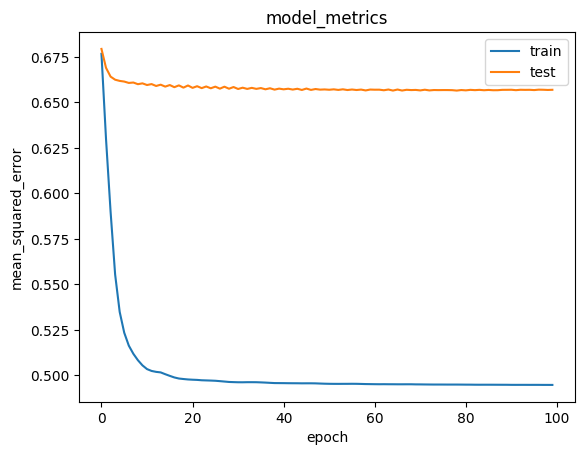

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_metrics')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Grafik menunjukkan *loss* dan *val_loss* serta RMSE pada training dan validasi. RMSE training menurun hingga mendekati 0.49, sementara RMSE validasi stabil di sekitar 0.655.

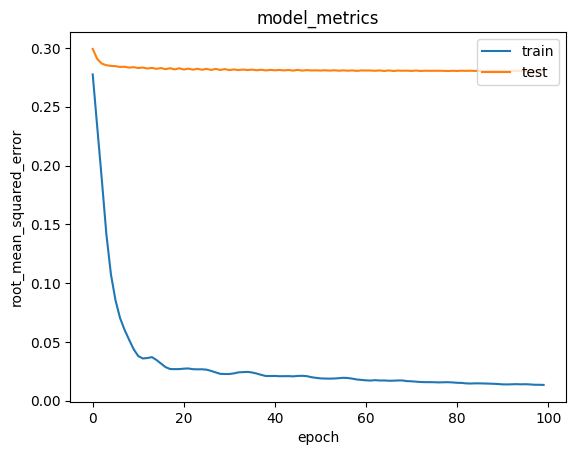

In [80]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Grafik RMSE training mencapai sekitar 0.02 dan RMSE validasi turun ke kisaran 0.285. Ini menunjukkan perbaikan signifikan dalam generalisasi dan akurasi prediksi model.

## Mendapatkan Rekomendasi

In [65]:
movie_df = df_content

# Mengambil sample user
user_id = df_collaborative.userId.sample(1).iloc[0]
movie_watched_by_user = df_collaborative[df_collaborative.userId == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
movie_not_watched = movie_df[~movie_df['movieId'].isin(movie_watched_by_user.movieId.values)]['movieId']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)
user_movie_array = tf.convert_to_tensor(user_movie_array, dtype=tf.int32)

Kode ini bertujuan untuk menyiapkan data input bagi model dalam memberikan rekomendasi film kepada seorang pengguna. Pertama, seluruh data film disalin ke dalam variabel `movie_df`. Kemudian, dipilih secara acak satu `userId` dari data collaborative filtering (`df_collaborative`), dan diambil daftar film yang sudah ditonton oleh pengguna tersebut. Selanjutnya, dengan menggunakan operator bitwise NOT (`~`) dan fungsi `isin`, disaring daftar film yang *belum* ditonton oleh pengguna. Daftar ini kemudian difilter agar hanya mencakup film yang memiliki representasi dalam kamus `movie_to_movie_encoded`. Setiap ID film dalam daftar tersebut kemudian dikonversi ke bentuk numerik dan dikombinasikan dengan ID pengguna yang juga telah dienkode. Akhirnya, seluruh pasangan pengguna–film yang akan diprediksi dikonversi menjadi tensor (`tf.convert_to_tensor`) dengan tipe data `int32`, yang siap diberikan sebagai input ke model untuk melakukan prediksi rekomendasi.


In [75]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-5:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['movieId'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.text)

print('----' * 8)
print('Top 5 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['movieId'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.text)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Showing recommendations for users: 474
Movie with high ratings from user
--------------------------------
sense and sensibility (1995) : drama romance jane austen
shawshank redemption, the (1994) : crime drama prison stephen king wrongful imprisonment crime drama morgan freeman
fugitive, the (1993) : thriller based on a tv show
memento (2000) : mystery thriller mystery twist ending mystery thriller backwards. memory mystery thriller mystery psychological twist ending mystery thriller cerebral dreamlike mystery thriller dark mindfuck nonlinear psychology twist ending
about a boy (2002) : comedy drama romance nick hornby
--------------------------------
Top 5 movie recommendation
--------------------------------
jezebel (1938) : drama bette davis oscar (best actress)
gone baby gone (2007) : crime drama mystery casey affleck great performances twist
dark knight, the (2008) : action crime drama imax dark gritty action crime drama imax psychology supe

**Top Movie dengan rating tinggi dari user dengan id 474:**
1. *sense and sensibility (1995)*
2. *shawshank redemption, the (1994)*
3. *fugitive, the (1993)*
4. *memento (2000)*
5. *about a boy (2002)*


**Top 5 Movie Recommendation yang cocok dengan user dengan id 474:**
1. *jezebel (1938)*
2. *gone baby gone (2007)*
3. *the dark knight (2008)*
4. *the hateful eight (2015)*
5. *who killed chea vichea? (2010)*